In [119]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
results_path='../../results/20221110-204950/results_500.csv'

In [13]:
df=pd.read_csv(results_path)
df['true']=df['true'].apply(lambda x:'Modality'+x)

In [19]:
caption

'Modality: CT w/contrast (IV) Plane: Axial Anatomy: Gastrointestinal Findings: dilated inflammed, nonfilling appendix Impression: Acute Append'

In [15]:
caption=df['true'].iloc[0]


In [24]:
caption

'Modality: CT w/contrast (IV) Plane: Axial Anatomy: Gastrointestinal Findings: dilated inflammed, nonfilling appendix Impression: Acute Append'

In [64]:
df['true_modality']=df['true'].apply(extract_modality)
df['true_plane']=df['true'].apply(extract_plane)
df['true_anatomy']=df['true'].apply(extract_anatomy)
df['true_impression']=df['true'].apply(extract_impression)

df['predicted_modality']=df['predicted'].apply(extract_modality)
df['predicted_plane']=df['predicted'].apply(extract_plane)
df['predicted_anatomy']=df['predicted'].apply(extract_anatomy)
df['predicted_impression']=df['predicted'].apply(extract_impression)


In [63]:
def extract_modality(caption):
    l_caption=caption.lower()
    start_index=l_caption.find(':',l_caption.find('modality'))+1
    end_index=l_caption.find('plane')-1
    modality=caption[start_index:end_index].strip().lower()
    return modality

def extract_plane(caption):
    l_caption=caption.lower()
    start_index=l_caption.find(' ',l_caption.find('plane'))+1
    end_index=l_caption.find('anatomy')-1
    modality=caption[start_index:end_index].strip().lower()
    return modality

def extract_anatomy(caption):
    l_caption=caption.lower()
    start_index=l_caption.find(':',l_caption.find('anatomy'))+1
    end_index=l_caption.find('findings')-1
    modality=caption[start_index:end_index].strip().lower()
    return modality

def extract_impression(caption):
    l_caption=caption.lower()
    start_index=l_caption.find(':',l_caption.find('impression'))+1
    modality=caption[start_index:].strip().lower()
    return modality

In [105]:
# Replacing plane strings to match labels 
df['true_plane']=df['true_plane'].str.replace('3d\nreconstruction','3d reconstruction')
df['true_plane']=df['true_plane'].str.replace('3d\nreconstruction','3d reconstruction')

df['true_plane']=df['true_plane'].str.replace('nan', 'not specified')
df['true_plane']=df['true_plane'].str.replace('nos - not specified','not specified')
df['true_plane']=df['true_plane'].str.replace('nos not\nspecified','not specified')
df['true_plane']=df['true_plane'].str.replace('nos not specified','not specified')

df['true_plane']=df['true_plane'].str.replace( "other view \(see caption\)",'not specified')
df['true_plane']=df['true_plane'].str.replace( 'other view see caption','not specified')

df['true_plane']=df['true_plane'].str.replace( 'sagittal','lateral')




df['predicted_plane']=df['predicted_plane'].str.replace('3d\nreconstruction','3d reconstruction')
df['predicted_plane']=df['predicted_plane'].str.replace('3d\nreconstruction','3d reconstruction')

df['predicted_plane']=df['predicted_plane'].str.replace('nan', 'not specified')
df['predicted_plane']=df['predicted_plane'].str.replace('nos - not specified','not specified')
df['predicted_plane']=df['predicted_plane'].str.replace('nos not\nspecified','not specified')
df['predicted_plane']=df['predicted_plane'].str.replace('nos not specified','not specified')

df['predicted_plane']=df['predicted_plane'].str.replace( 'other view (see caption)','not specified')
df['predicted_plane']=df['predicted_plane'].str.replace( 'other view see caption','not specified')


df['predicted_plane']=df['predicted_plane'].str.replace( 'sagittal','lateral')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: The default value of regex will change from True to False in a future version.


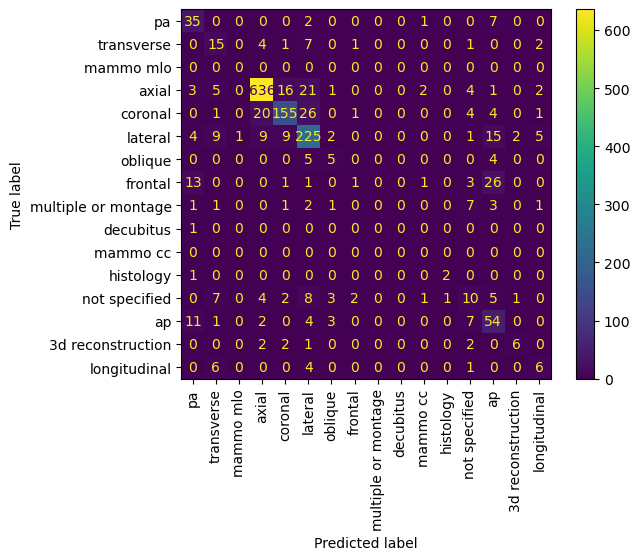

In [123]:
y_true = df['true_plane']
y_pred = df['predicted_plane']
uniques = list(set(np.concatenate([y_true,y_pred])))
cm = confusion_matrix(y_true, y_pred, labels=uniques)



disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=uniques)
disp.plot(xticks_rotation='vertical')


In [114]:
list(uniques)

['pa',
 'transverse',
 'mammo mlo',
 'axial',
 'coronal',
 'lateral',
 'oblique',
 'frontal',
 'multiple or montage',
 'decubitus',
 'mammo cc',
 'histology',
 'not specified',
 'ap',
 '3d reconstruction',
 'longitudinal']